In [1]:
import cv2
import numpy as np

In [2]:
# Reading a image as input
inputIm = cv2.imread("./ImageRGB.jpg")

# This is how to display a image in OpenCV
# The first parameter will be the image title on a new window
# the second parameter is the image
cv2.imshow("Hello World !!!", inputIm)

# This command allow to input information when a image window is open
cv2.waitKey(0)

# This command closes all the open windows
cv2.destroyAllWindows()

In [3]:
# This print a triple that represents, respectively, the height, width and number of channels
print(inputIm.shape)

print("\nHeight Of The Image : {}\n".format(inputIm.shape[0]))
print("Width Of The Image : {}\n".format(inputIm.shape[1]))
print("Numbers Of Channels : {}\n".format(inputIm.shape[2]))

(1080, 1920, 3)

Height Of The Image : 1080

Width Of The Image : 1920

Numbers Of Channels : 3



In [4]:
# This command save a new image
# The first parameter is the new image name and the second is the image input
cv2.imwrite("NewImageTest.png", inputIm)

True

Creating a Grey image from a RGB image


In [5]:
grayImage = cv2.cvtColor(inputIm, cv2.COLOR_BGR2GRAY)

cv2.imshow("Gray Scale", grayImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

# This command read a image and convert to Gray images
#cv2.imread("./ImageRGB.jpg", 0)

Getting the values of the pixels in a coordinate


In [6]:
# Looking to a RGB Image
B, G, R = inputIm[0, 0]

print("Red {}\n".format(R))
print("Green {}\n".format(G))
print("Blue {}\n".format(B))

Red 197

Green 140

Blue 133



In [7]:
# Looking to a gray image

pixel = grayImage[0, 0]

print("Pixel Value {}\n".format(pixel))

Pixel Value 156



Using the color space HSV

In [8]:
imageHSV = cv2.cvtColor(inputIm, cv2.COLOR_BGR2HSV)

cv2.imshow("HSV image", imageHSV)
cv2.waitKey(0)
cv2.imshow("Hue Channel", imageHSV[:, :, 0])
cv2.waitKey(0)
cv2.imshow("Saturation Channel", imageHSV[:, :, 1])
cv2.waitKey(0)
cv2.imshow("Value Channel", imageHSV[:, :, 2])
cv2.waitKey(0)

cv2.destroyAllWindows()

In [9]:
# Seeing each channel in the image

blueIm, greenIm, redIm = cv2.split(inputIm)

print("Red Shape {}\n".format(redIm.shape))
print("Green Shape {}\n".format(greenIm.shape))
print("Blue Shape {}\n".format(blueIm.shape))

cv2.imshow("Red Channel", redIm)
cv2.waitKey(0)
cv2.imshow("Green Channel", greenIm)
cv2.waitKey(0)
cv2.imshow("Blue Channel", blueIm)
cv2.waitKey(0)

cv2.destroyAllWindows()

Red Shape (1080, 1920)

Green Shape (1080, 1920)

Blue Shape (1080, 1920)



In [10]:
# let's re-make the original image
mergedIm = cv2.merge([blueIm, greenIm, redIm])
cv2.imshow("Merged Image", mergedIm)
cv2.waitKey(0)

# let's amplify the red color
mergedImAmp = cv2.merge([blueIm, greenIm, redIm + 100])
cv2.imshow("Merged Image With the Red Amplified", mergedImAmp)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [11]:
# let's print the image with the color red, green and blue

# this function creates a numpy matrix with zeros of size h x w from the image
zeros = np.zeros(inputIm.shape[:2], dtype = "uint8")

cv2.imshow("Red Color", cv2.merge([zeros, zeros, redIm]))
cv2.waitKey(0)
cv2.imshow("Green color", cv2.merge([zeros, greenIm, zeros]))
cv2.waitKey(0)
cv2.imshow("Blue Color", cv2.merge([blueIm, zeros, zeros]))
cv2.waitKey(0)

cv2.destroyAllWindows()

Creating Histograms to visualize individual color components

In [12]:
import matplotlib.pyplot as plt

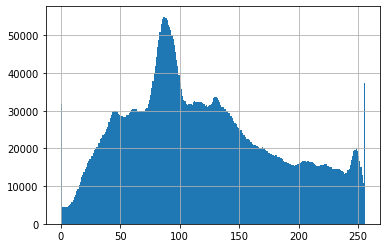

In [13]:
histogram = cv2.calcHist([inputIm], [0], None, [256], [0, 256])

# ploting the histogram
# THe ravel function flat the image as a 1D-array
plt.hist(inputIm.ravel(), 256, [0, 256])
plt.grid(True)
plt.show()

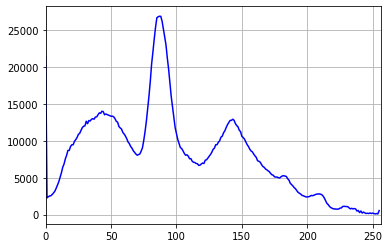

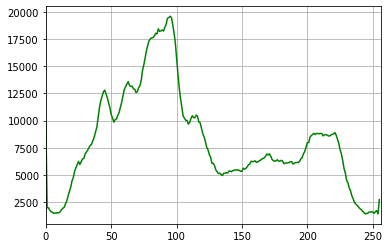

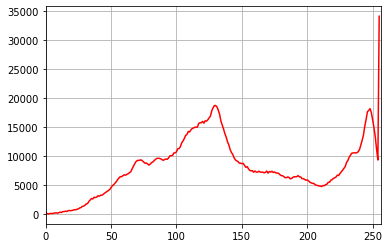

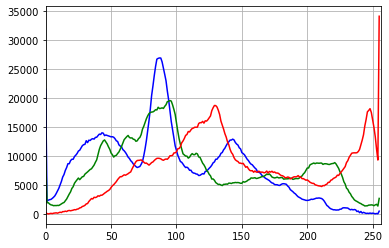

In [14]:
# seeing separately the colors channels
color = ("b", "g", "r")
histogramAllColors = None

# This looping separate the colors and plot each one in the Histogram
for i, col in enumerate(color):
    
    histogramColor = cv2.calcHist([inputIm], [i], None, [256], [0, 256])
    histogramAllColors = histogramColor
    plt.plot(histogramColor, color = col)
    plt.xlim([0, 256])
    plt.grid(True)
    
    # creating a histogram for each channel
    plt.show()

# creating a histogram with all the 3 channels

for i, col in enumerate(color):
    
    histogramColor = cv2.calcHist([inputIm], [i], None, [256], [0, 256])
    plt.plot(histogramColor, color = col)
    plt.xlim([0, 256])

plt.grid(True)
    
# creating a histogram for each channel
plt.show()

Drawing in images and create shapes using OpenCv

In [15]:
# creating a empty RGB image
emptyIm = np.zeros((512, 512, 3), np.uint8)

# creating a empty black and white image
emptyBWIm = np.zeros((512, 512), np.uint8)

cv2.imshow("Black RGB rectangle", emptyIm)
cv2.waitKey(0)
cv2.imshow("Black black and white rectangle", emptyBWIm)
cv2.waitKey(0)

cv2.destroyAllWindows()

Let's draw a line in the image

In [16]:
# Drawing a diagonal blue line of thicness of 5 pixels that stars at (0, 0) and goes to (511, 511)
cv2.line(emptyIm, (0, 0), (511, 511), (250, 127, 0), 5)
cv2.imshow("Blue Line Drawn", emptyIm)
cv2.waitKey(0)

cv2.destroyAllWindows()

Let's draw a rectangle

In [17]:
cv2.rectangle(emptyIm, (100, 100), (300, 500), (127, 50, 127), 5)
cv2.imshow("Rectangle", emptyIm)
cv2.waitKey(0)

cv2.destroyAllWindows()

Let's draw a circle in the image

In [18]:
# -1 fill all the draw figure
cv2.circle(emptyIm, (350, 350), 100, (15, 75, 50), -1)
cv2.imshow("Circle", emptyIm)
cv2.waitKey(0)

cv2.destroyAllWindows()

Drawing a Polygon

In [19]:
emptyIm = np.zeros((512, 512, 3), np.uint8)

# Creating a polygon using 4 pounts
pts = np.array([[10, 50], [400, 50], [90, 200], [50, 500]], np.int32)

# Reshaping the points in to make the correclty form
pts = pts.reshape((-1, 1, 2))

cv2.polylines(emptyIm, [pts], True, (0, 0, 255), 3)
cv2.imshow("Polygon", emptyIm)
cv2.waitKey(0)

cv2.destroyAllWindows()

Let's add text in images

In [20]:
emptyIm = np.zeros((512, 512, 3), np.uint8)

cv2.putText(emptyIm, "Hello World !!!", (75, 290), cv2.FONT_HERSHEY_COMPLEX, 2, (100, 170, 0), 3)

cv2.imshow("Hello World !!!", emptyIm)
cv2.waitKey(0)

cv2.destroyAllWindows()